Payton Rollag
March 13, 2019
B ME 450
Abadi
Final Project- CTD Data Analysis



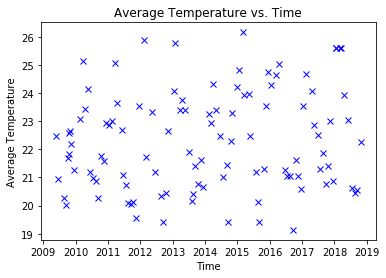

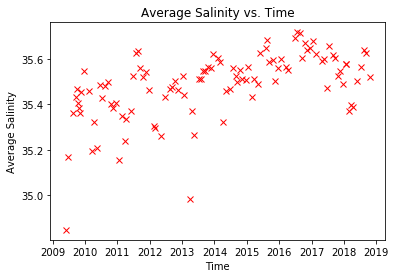

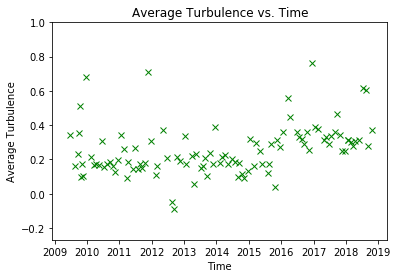

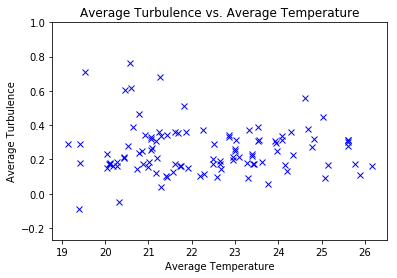

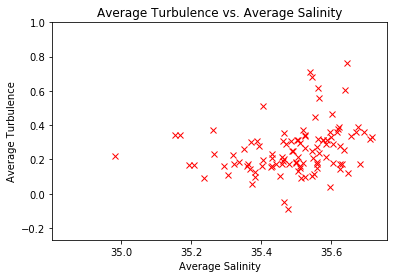

In [2]:
"""
Payton Rollag
March 13, 2019
B ME 450
Abadi
Final Project
"""
# Print heading for report with spacing after
print("Payton Rollag")
print("March 13, 2019")
print("B ME 450")
print("Abadi")
print("Final Project- CTD Data Analysis")
print("")


import datetime
import codecs
import csv
import os
import random
import matplotlib.pyplot as plt
import numpy as np


# Selecting file
SELECTED_FILE = codecs.open("IMOS_-_Australian_National_Mooring_Network_(ANMN)_-_CTD_Profiles.csv", 'r', 'utf-8')

# Creating a reader for the csv file
CSV_READER = csv.reader(SELECTED_FILE, delimiter=',')

# Counter to keep track of which line we are at in the file being read.
LINE = 0

# Keeping track of file id.
file_id = 0
# Different variables
AVG_TIME = []
AVG_TEMP = []
AVG_SAL = []
AVG_TURB = []
temp_avg_temp = []
temp_avg_sal = []
temp_avg_turb = []

# Going through line by line.
for row in CSV_READER:
    # Beginning row by row data collecting.
    if LINE >= 30:
        # Intial file id
        if file_id == 0:
            # Setting first file id.
            file_id = int(row[1])
            
            # Getting time which is in string to a time object
            t_string = str(row[6])
            d = datetime.date(int(t_string[0:4]), int(t_string[5:7]), int(t_string[8:10]))
            t = datetime.time(int(t_string[11:13]), int(t_string[14:16]), int(t_string[17:19]))
            
            # Adding time for x-axis 
            AVG_TIME.append(datetime.datetime.combine(d, t))
        if file_id == int(row[1]):
            try:
                # Get the temperature, salinity, and turbulence for that row.
                temp_avg_temp.append(float(row[20]))
                temp_avg_sal.append(float(row[22]))
                temp_avg_turb.append(float(row[26]))
            except:
                continue
        # Check if file id has changed.
        if file_id != int(row[1]):
            # Find and add the averages for each file id temperature, salinity, and turbulence to their average arrays.
            AVG_TEMP.append(sum(temp_avg_temp)/len(temp_avg_temp))
            AVG_SAL.append(sum(temp_avg_sal)/len(temp_avg_sal))
            AVG_TURB.append(sum(temp_avg_turb)/len(temp_avg_turb))

            # Clear and prepare for next file set.
            temp_avg_temp = []
            temp_avg_sal = []
            temp_avg_turb = []
            
            # Change file id to next file
            file_id = int(row[1])
            # Add first row for new file id
            try:
                temp_avg_temp.append(float(row[20]))
                temp_avg_sal.append(float(row[22]))
                temp_avg_turb.append(float(row[26]))
            except:
                continue
            # Add time stamp to x-axis array.
            t_string = str(row[6])
            d = datetime.date(int(t_string[0:4]), int(t_string[5:7]), int(t_string[8:10]))
            t = datetime.time(int(t_string[11:13]), int(t_string[14:16]), int(t_string[17:19]))
            AVG_TIME.append(datetime.datetime.combine(d, t))
    # Move to next line in file
    LINE += 1

# Closing file
SELECTED_FILE.close()
# Remove access timestamp.
del AVG_TIME[-1]

# Initializing graph
plt.plot(AVG_TIME, AVG_TEMP, 'x', color='b')
# Labeling x-axis
plt.xlabel("Time")
# Labeling y-axis
plt.ylabel("Average Temperature")
# Giving graph a title
plt.title("Average Temperature vs. Time")
# Displaying graph
plt.show()

# Initializing graph
plt.plot(AVG_TIME, AVG_SAL, 'x', color='r')
# Labeling x-axis
plt.xlabel("Time")
# Labeling y-axis
plt.ylabel("Average Salinity")
# Giving graph a title
plt.title("Average Salinity vs. Time")
# Displaying graph
plt.show()

# Initializing graph
plt.plot(AVG_TIME, AVG_TURB, 'x', color='g')
# Labeling x-axis
plt.xlabel("Time")
# Labeling y-axis
plt.ylabel("Average Turbulence")
# Giving graph a title
plt.title("Average Turbulence vs. Time")
plt.ylim(top= 1)
# Displaying graph
plt.show()

# Initializing graph
plt.plot(AVG_TEMP, AVG_TURB, 'x', color='b')
# Labeling y-axis
plt.ylabel("Average Turbulence")
# Labeling x-axis
plt.xlabel("Average Temperature")
# Giving graph a title
plt.title("Average Turbulence vs. Average Temperature")
plt.ylim(top= 1)
# Displaying graph
plt.show()

# Initializing graph
plt.plot(AVG_SAL, AVG_TURB, 'x', color='r')
# Labeling y-axis
plt.ylabel("Average Turbulence")
# Labeling x-axis
plt.xlabel("Average Salinity")
# Giving graph a title
plt.title("Average Turbulence vs. Average Salinity")
plt.ylim(top= 1)
# Displaying graph
plt.show()